In [5]:
!pip install opencv-python

In [6]:
!pip install deepface

In [7]:
import cv2
from deepface import DeepFace

In [8]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [11]:
# 1.creating a video object
video = cv2.VideoCapture(0) 
# 2. Variable
a = 0
# 3. While loop
while True:
    a = a + 1
    # 4.Create a frame object
    check, frame = video.read()
    # Converting to grayscale
    #gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    # 5.show the frame!
    cv2.imshow("Capturing",frame)
    # 6.for playing 
    key = cv2.waitKey(1)
    if key == ord('q'):
        break
# 7. image saving
showPic = cv2.imwrite("photo.jpg",frame)
print(showPic)
# 8. shutdown the camera
video.release()
cv2.destroyAllWindows 

True


<function destroyAllWindows>

In [12]:
img = cv2.imread('photo.jpg')

In [13]:
import matplotlib.pyplot as plt

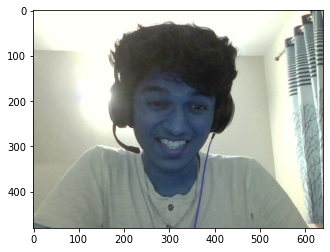

In [14]:
plt.imshow(img)

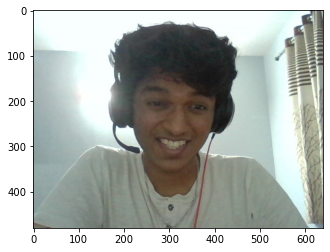

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [16]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████| 4/4 [00:24<00:00,  6.20s/it]


In [17]:
predictions

{'region': {'x': 220, 'y': 134, 'w': 175, 'h': 206},
 'emotion': {'angry': 1.4427145700324218e-06,
  'disgust': 7.659761293668001e-14,
  'fear': 7.36389074718069e-10,
  'happy': 99.76502060890198,
  'sad': 2.698468115625019e-06,
  'surprise': 3.016070309058705e-05,
  'neutral': 0.2349484944716096},
 'dominant_emotion': 'happy',
 'age': 27,
 'gender': 'Man',
 'race': {'asian': 6.451525923700686,
  'indian': 38.732954188165316,
  'black': 44.12499333172997,
  'white': 0.6672912675017874,
  'middle eastern': 0.743443749454245,
  'latino hispanic': 9.279794799077202},
 'dominant_race': 'black'}

## Not needed for now

In [18]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(frame, actions = ['emotion'])

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,1.1,4)

  # Draw a rectangle around the face
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y), (x+w, y+h), (0,255,0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX

  #Using putText() method to insert text onto video

    cv2.putText(frame,
              result['dominant_emotion'],
              (50,50),
              font, 3,
              (0,0,255),
              2,
              cv2.LINE_4)
    cv2.imshow('Original video', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Action: emotion:   0%|          | 0/4 [00:02<?, ?it/s]


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.